In [1]:
# Importing Libraries and python files
from src import Vehicle_Number_Plate_Extractor as vc
from src import parkingSpaceAnalysis as psa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Vehicle Matching

In [2]:
# reading Authorized Vehicles dataset
vehicle_db = pd.read_csv('Datasets/authorized_Vehicles.csv')

In [3]:
# create an object for NumberPlateRecognizer and pass Image path as Parameter
numPlate = vc.NumberPlateRecognizer('paste image path here...')
number = numPlate.Retrieve_Number_plate()
number = number.upper()

In [4]:
# print the retrieved number plate
print(number)
# check the Authorization of the Vehicle
if number in vehicle_db['auth_Cars'].values:
    print("Authorized Vehicle")
else:
    print("Unauthorized Vehicle")

AP39E1493
Authorized Vehicle


# Parking Occupancy

In [3]:
# Creating object for ParkingSpace class
parking = psa.ParkingSpace()

In [4]:
'''
Parking images are stored in parkingLotImages
This function randomly picks any image shows it's occupancy
Run the function multiple times to get different occupancies of the parking lot
NOTE: Some images are similar, please re-run this code block multiple times to get different images
You can the available slots at the top left corner
NOTE: close the parking lot image by clicking on the close window button to stop the execution of this code block
'''
parking.parkingLotImg()


0: 320x640 5 cars, 2 buss, 270.0ms
Speed: 9.0ms preprocess, 270.0ms inference, 25.3ms postprocess per image at shape (1, 3, 320, 640)
Available slots for parking:11


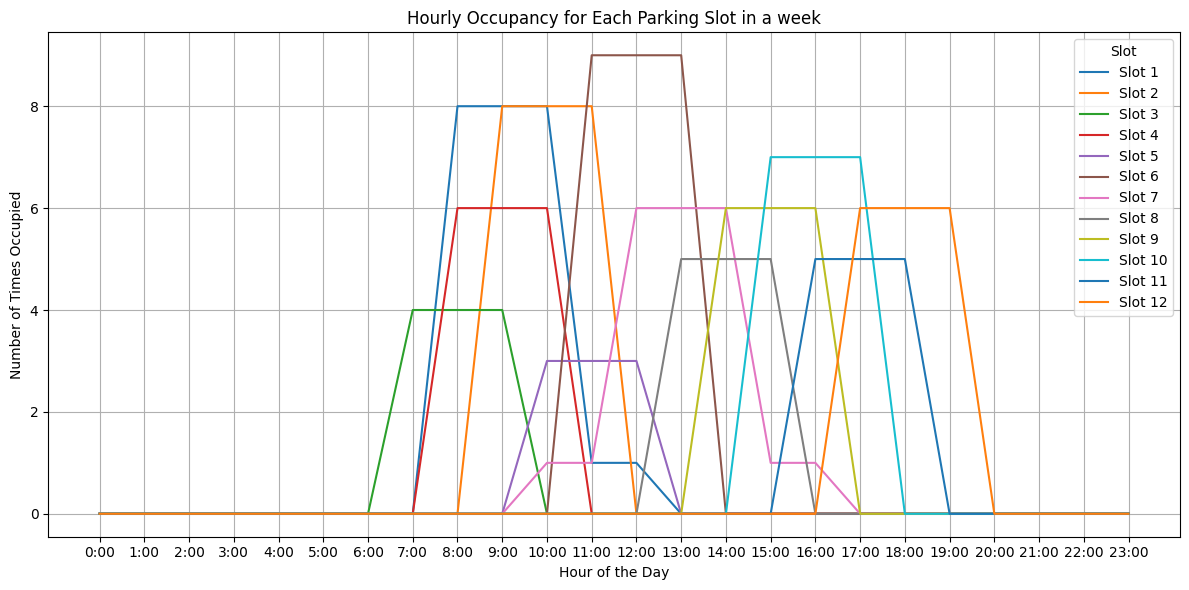

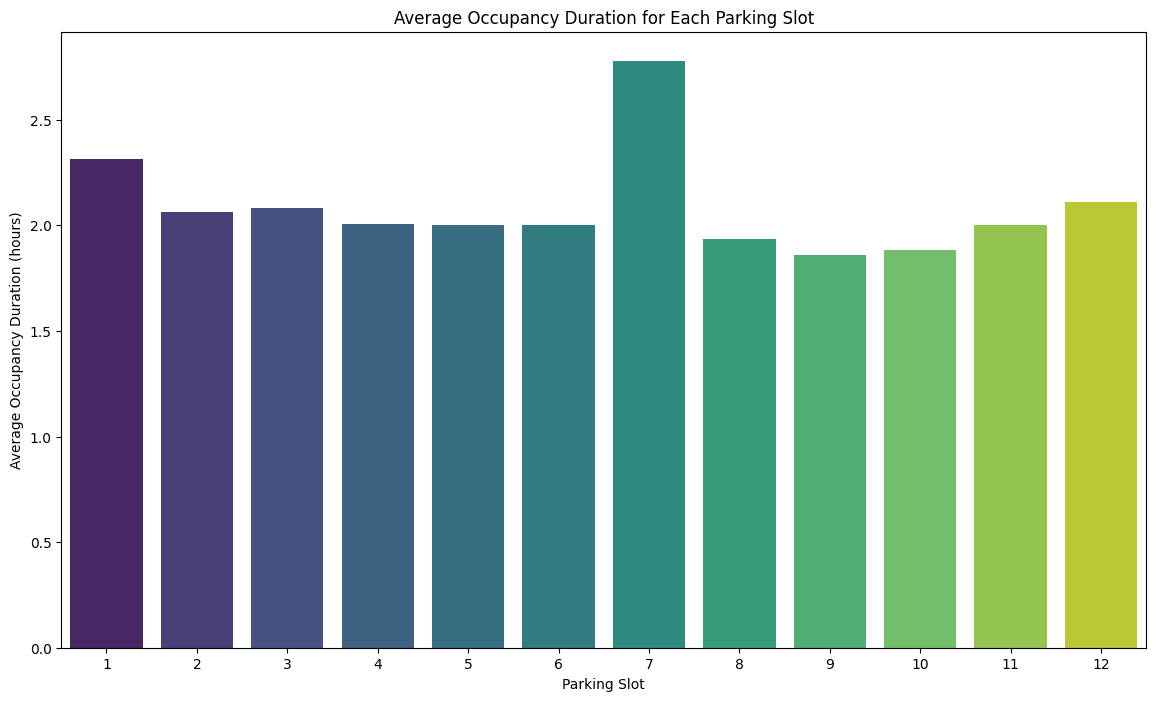

In [5]:
# parking slot analysis
parking.slotAnalysis()

# Vehicle Movement Patterns

In [6]:
# read dataset
data = pd.read_csv('Datasets/VehicleEntryExit.csv')

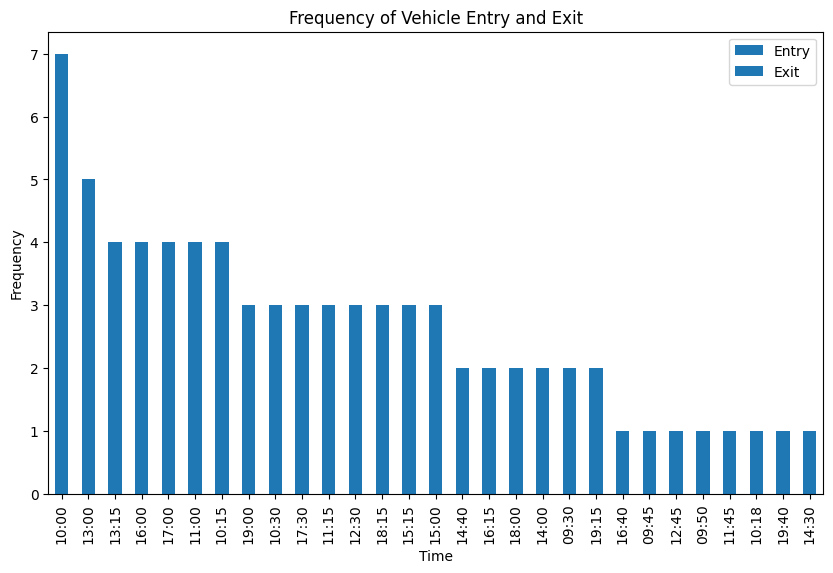

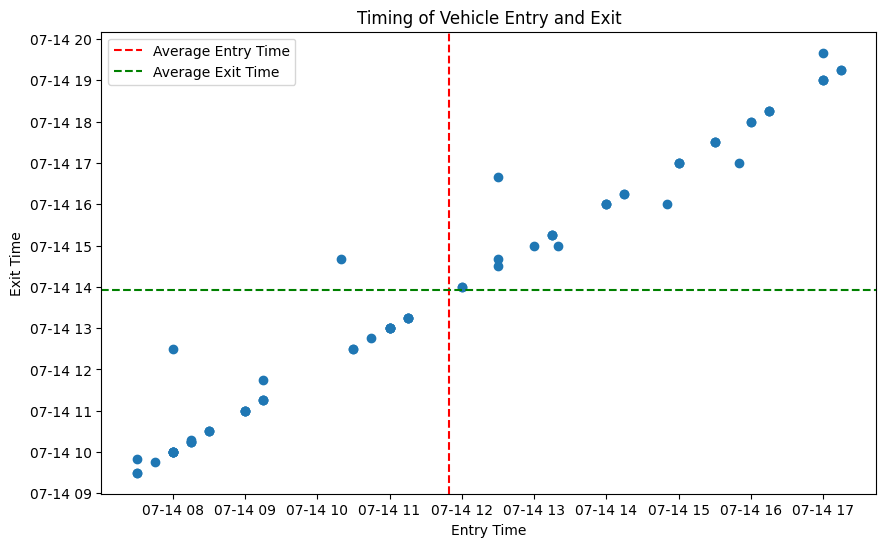

Peak Entry Times: Index(['08:00', '11:00', '17:00', '08:15', '09:00'], dtype='object', name='Entry_Time')
Peak Exit Times: Index(['10:00', '13:00', '13:15', '16:00', '17:00'], dtype='object', name='Exit_Time')


In [7]:
# Analyze the frequency of vehicle movement
entry_counts = data['Entry_Time'].value_counts()
exit_counts = data['Exit_Time'].value_counts()

# Plot the frequency of vehicle entry and exit
plt.figure(figsize=(10, 6))
entry_counts.plot(kind='bar', label='Entry')
exit_counts.plot(kind='bar', label='Exit')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Frequency of Vehicle Entry and Exit')
plt.legend()
plt.show()

# Analyze the timing of vehicle movement
data['Entry_Time'] = pd.to_datetime(data['Entry_Time'])
data['Exit_Time'] = pd.to_datetime(data['Exit_Time'])

# Calculate the average entry and exit times
avg_entry_time = data['Entry_Time'].mean()
avg_exit_time = data['Exit_Time'].mean()

# Plot the average entry and exit times
plt.figure(figsize=(10, 6))
plt.scatter(data['Entry_Time'], data['Exit_Time'])
plt.axvline(x=avg_entry_time, color='red', linestyle='--', label='Average Entry Time')
plt.axhline(y=avg_exit_time, color='green', linestyle='--', label='Average Exit Time')
plt.xlabel('Entry Time')
plt.ylabel('Exit Time')
plt.title('Timing of Vehicle Entry and Exit')
plt.legend()
plt.show()

# Identify peak times and patterns
peak_entry_times = entry_counts.sort_values(ascending=False).head(5).index
peak_exit_times = exit_counts.sort_values(ascending=False).head(5).index

print('Peak Entry Times:', peak_entry_times)
print('Peak Exit Times:', peak_exit_times)